# Wilks and empirical quantile estimators

In this example we want to evaluate a particular quantile, with the empirical estimator or the Wilks one, from a sample of a random variable.


Let's suppose we want to estimate the quantile $q_{\alpha}$ of order $\alpha$ of the variable $Y$:
$P(Y \leq q_{\alpha}) = \alpha$, from the sample $(Y_1, ..., Y_n)$
of size $n$, with a confidence level equal to $\beta$.

We note $(Y^{(1)}, ..., Y^{(n)})$ the sample where the values are sorted in ascending order.
The empirical estimator, noted $q_{\alpha}^{emp}$, and its confidence interval, is defined by the expressions:
$$\left\{
  \begin{array}{lcl}
    q_{\alpha}^{emp} & = & Y^{(E[n\alpha])} \\
    P(q_{\alpha} \in [Y^{(i_n)}, Y^{(j_n)}]) & = & \beta \\
    i_n & = & E[n\alpha - a_{\alpha}\sqrt{n\alpha(1-\alpha)}] \\
    i_n & = & E[n\alpha + a_{\alpha}\sqrt{n\alpha(1-\alpha)}]
  \end{array}
  \right.$$

The Wilks estimator, noted $q_{\alpha, \beta}^{Wilks}$, and its confidence interval, is defined by the expressions:

$$\left\{
  \begin{array}{lcl}
    q_{\alpha, \beta}^{Wilks} & = & Y^{(n-i)} \\
    P(q_{\alpha}  \leq q_{\alpha, \beta}^{Wilks}) & \geq & \beta \\
    i\geq 0 \, \, /  \, \, n \geq N_{Wilks}(\alpha, \beta,i)
  \end{array}
  \right.$$

Once the order $i$ has been chosen, the Wilks number $N_{Wilks}(\alpha, \beta,i)$ is evaluated,
thanks to the static method $ComputeSampleSize(\alpha, \beta, i)$ of the Wilks object.

In the example, we want to evaluate a quantile $\alpha = 95\%$,
with a confidence level of $\beta = 90\%$ thanks to the $4$th maximum of
the ordered sample (associated to the order $i = 3$).

Be careful: $i=0$ means that the Wilks estimator is the maximum of the sample:
it corresponds to the first maximum of the sample.

In [30]:
from __future__ import print_function
import openturns as ot
import math as m

In [31]:
model = ot.SymbolicFunction(['x1', 'x2'], ['x1^2+x2'])
R = ot.CorrelationMatrix(2)
R[0,1] = -0.6
inputDist = ot.Normal([0.,0.], R)
inputDist.setDescription(['X1','X2'])
inputVector = ot.RandomVector(inputDist)

# Create the output random vector Y=model(X)
output = ot.CompositeRandomVector(model, inputVector)

In [32]:
# Quantile level
alpha = 0.95

# Confidence level of the estimation
beta = 0.90

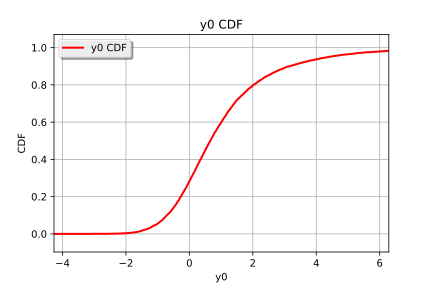

In [33]:
# Get a sample of the variable
N = 10**4
sample = output.getSample(N)
ot.VisualTest.DrawEmpiricalCDF(sample)

In [34]:
# Empirical Quantile Estimator
empiricalQuantile = sample.computeQuantile(alpha)

# Get the indices of the confidence interval bounds
aAlpha = ot.Normal(1).computeQuantile((1.0+beta)/2.0)[0]
min_i = int(N*alpha - aAlpha*m.sqrt(N*alpha*(1.0-alpha)))
max_i = int(N*alpha + aAlpha*m.sqrt(N*alpha*(1.0-alpha)))
#print(min_i, max_i)

# Get the sorted sample
sortedSample = sample.sort()

# Get the Confidence interval of the Empirical Quantile Estimator [infQuantile, supQuantile]
infQuantile = sortedSample[min_i-1]
supQuantile = sortedSample[max_i-1]
print(infQuantile, empiricalQuantile, supQuantile)

[4.28423] [4.38014] [4.51415]


In [52]:
# Wilks number
i = N - (min_i+max_i)//2 # compute wilks with the same sample size
wilksNumber = ot.Wilks.ComputeSampleSize(alpha, beta, i)
print('wilksNumber =', wilksNumber)

wilksNumber = 10604


In [51]:
# Wilks Quantile Estimator
algo = ot.Wilks(output)
wilksQuantile = algo.computeQuantileBound(alpha, beta, i)
print('wilks Quantile 0.95 =', wilksQuantile)

wilks Quantile 0.95 = [4.52594]
